<a href="https://colab.research.google.com/github/Theallkeeeymist/Spotify-Data-Analysis/blob/main/Spotify_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flask dash pandas plotly seaborn pyngrok

INFO: pip is looking at multiple versions of dash to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dash to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 16.8 MB/s eta 0:00:00


In [2]:
from flask import Flask
import dash
from dash import html,dcc
import pandas as pd
import plotly.express as px
from dash.dependencies import Input, Output
from pyngrok import ngrok
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/genres_v2.csv')

print(data.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmR

<ipython-input-2-8315cdb27ce9>:10: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/genres_v2.csv')


In [3]:
!pip install pyngrok
!ngrok authtoken 2uHPVQSW5ZnIXgc9YonCYQnHKzP_5Ngx3mux4KmqLTjUi6Cer


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [4]:
print(data.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')


In [5]:
print(data[['danceability','key','loudness','mode','speechiness',
           'acousticness','instrumentalness','liveness','valence',
           'tempo','genre']].tail(10))

       danceability  key  loudness  mode  speechiness  acousticness  \
42295         0.634    5    -6.237     0       0.0536      0.001450   
42296         0.512    9    -3.203     0       0.4100      0.020500   
42297         0.406    9    -4.920     0       0.0666      0.191000   
42298         0.502    5    -4.333     0       0.2400      0.005540   
42299         0.423    4    -1.865     0       0.0615      0.010300   
42300         0.528    4    -5.148     1       0.0304      0.031500   
42301         0.517    0    -7.922     0       0.0479      0.022500   
42302         0.361    8    -3.102     1       0.0505      0.026000   
42303         0.477    6    -4.777     0       0.0392      0.000551   
42304         0.529    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo      genre  
42295          0.668000    0.0622   0.3240  149.990  hardstyle  
42296          0.000000    0.3310   0.0804  155.036  hardstyle  
42297          0.000092

In [6]:
print('title')

title


In [7]:
genre_danceability = data.groupby('genre')['danceability'].mean()
print(genre_danceability)

genre
Dark Trap          0.618834
Emo                0.493699
Hiphop             0.698982
Pop                0.676807
Rap                0.742877
RnB                0.674206
Trap Metal         0.647564
Underground Rap    0.744658
dnb                0.520944
hardstyle          0.478027
psytrance          0.617462
techhouse          0.786794
techno             0.715742
trance             0.507724
trap               0.593180
Name: danceability, dtype: float64


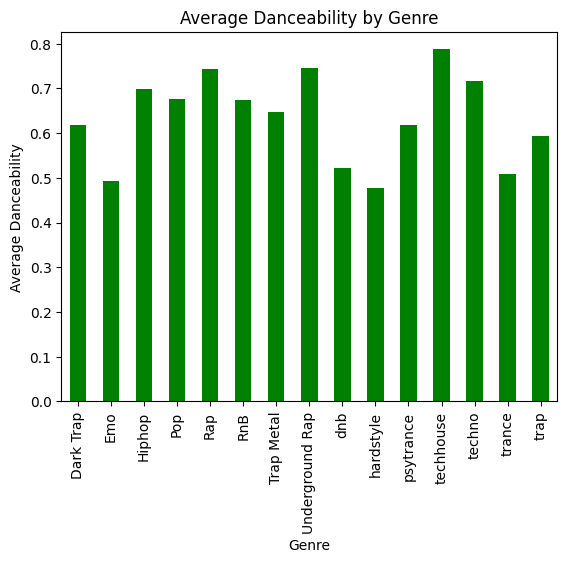

In [8]:
genre_danceability.plot(kind='bar', color='green')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Genre')
plt.show()

In [9]:
genre_energy=data.groupby('genre')['energy'].mean()
print(genre_energy)

genre
Dark Trap          0.646851
Emo                0.761175
Hiphop             0.654418
Pop                0.697638
Rap                0.620083
RnB                0.598884
Trap Metal         0.749157
Underground Rap    0.635776
dnb                0.873433
hardstyle          0.896238
psytrance          0.902392
techhouse          0.834481
techno             0.795714
trance             0.892435
trap               0.906060
Name: energy, dtype: float64


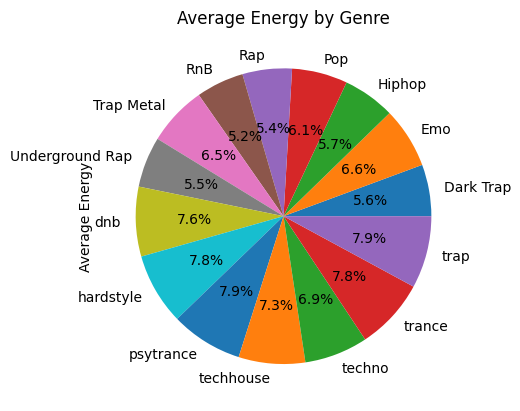

In [10]:
genre_energy.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Average Energy')
plt.title('Average Energy by Genre')

plt.show()

genre
Dark Trap         -7.6785
Emo               -4.7885
Hiphop            -6.6370
Pop               -5.4230
Rap               -6.6365
RnB               -6.5310
Trap Metal        -5.6125
Underground Rap   -7.1010
dnb               -3.9720
hardstyle         -4.2460
psytrance         -6.4750
techhouse         -6.8480
techno            -9.0430
trance            -6.5430
trap              -2.5350
Name: loudness, dtype: float64


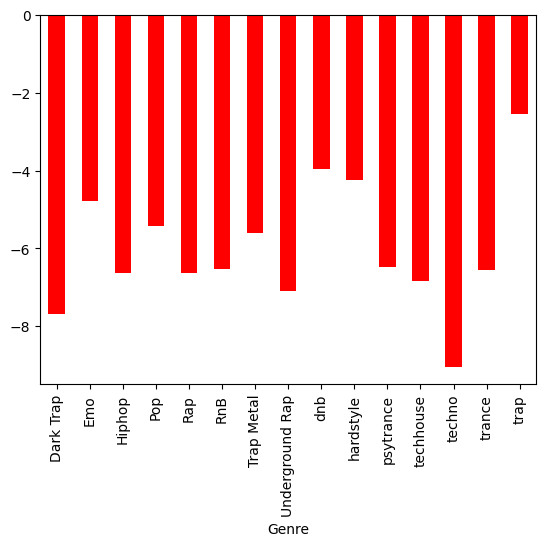

In [11]:
loudness_group=data.groupby('genre')['loudness'].median()
print(loudness_group)
loudness_group.plot(kind='bar', color='red')
plt.xlabel('Genre')

plt.show()

In [12]:
tempo_data = data.groupby('genre')['tempo'].mean()
print(tempo_data)

genre
Dark Trap          149.791186
Emo                153.888640
Hiphop             162.980479
Pop                152.098937
Rap                126.006374
RnB                157.533793
Trap Metal         148.684947
Underground Rap    152.914521
dnb                173.849166
hardstyle          150.659340
psytrance          142.688529
techhouse          124.927316
techno             128.971052
trance             134.625598
trap               147.691379
Name: tempo, dtype: float64


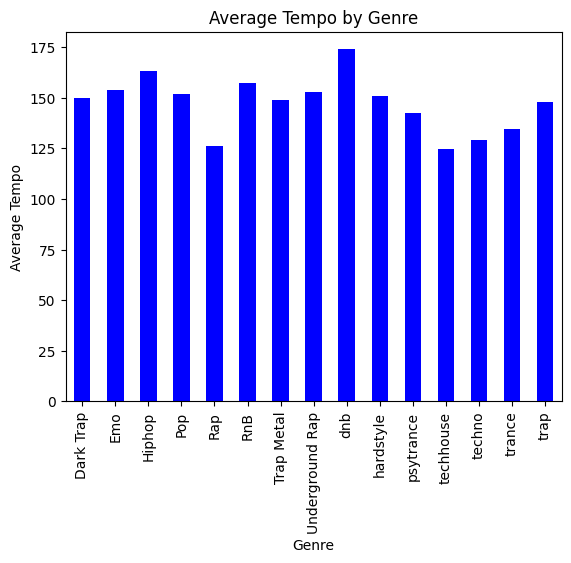

In [13]:
tempo_data.plot(kind='bar', color='blue')
plt.xlabel('Genre')
plt.ylabel('Average Tempo')
plt.title('Average Tempo by Genre')
plt.show()

In [14]:
liveness_data=data.groupby('genre')['liveness'].mean()
print(liveness_data)

genre
Dark Trap          0.185081
Emo                0.195243
Hiphop             0.210581
Pop                0.177949
Rap                0.181320
RnB                0.178984
Trap Metal         0.243655
Underground Rap    0.191116
dnb                0.202883
hardstyle          0.273830
psytrance          0.293434
techhouse          0.141387
techno             0.149137
trance             0.296976
trap               0.276127
Name: liveness, dtype: float64


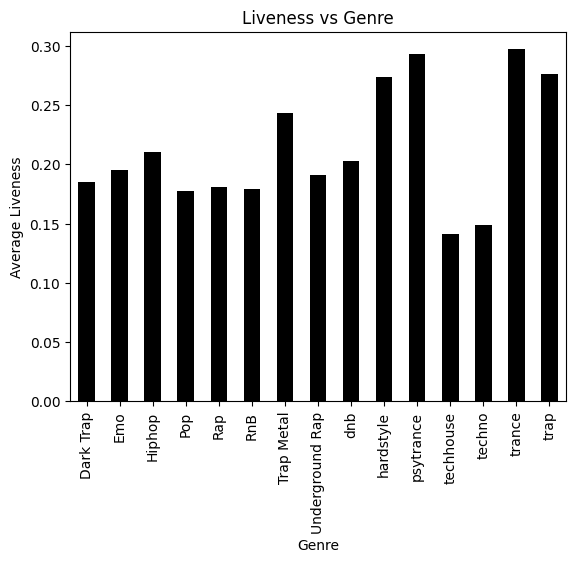

In [15]:
liveness_data.plot(kind='bar', color='black')
plt.xlabel('Genre')
plt.ylabel('Average Liveness')
plt.title('Liveness vs Genre')
plt.show()

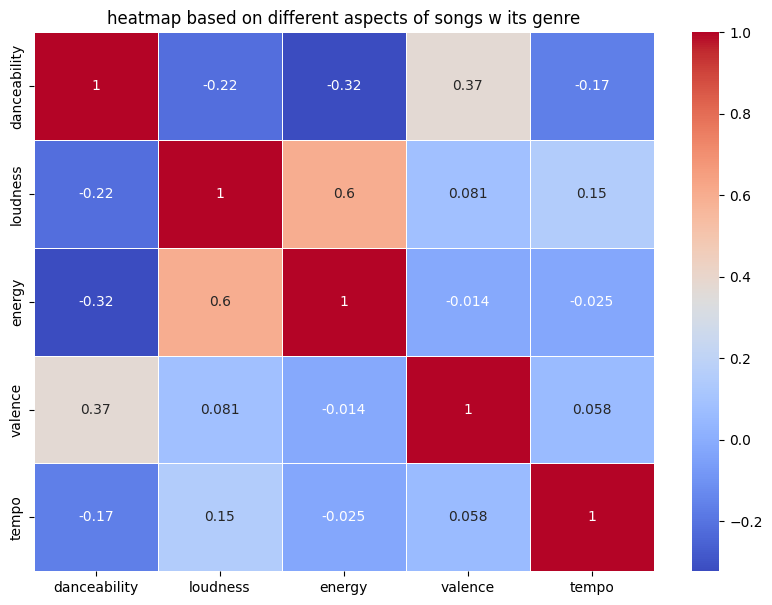

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(data[['danceability','loudness','energy','valence',
           'tempo']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('heatmap based on different aspects of songs w its genre')
plt.show()

In [17]:
def classify_mood(row):
  if(row["valence"]>0.7 and row["energy"]>0.6):
    return "happy"
  elif(row["valence"]<0.3 and row["loudness"]<-10):
    return "Sad"
  elif(row["tempo"]<90 and row["danceability"]<0.5):
    return "Chill"
  else:
    return "Energetic"

data["mood"]=data.apply(classify_mood, axis=1)
print(data["mood"].value_counts())

mood
Energetic    35863
happy         3673
Sad           2735
Chill           34
Name: count, dtype: int64


<ipython-input-18-08cc6d997a21>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="mood", data=data, palette="pastel")


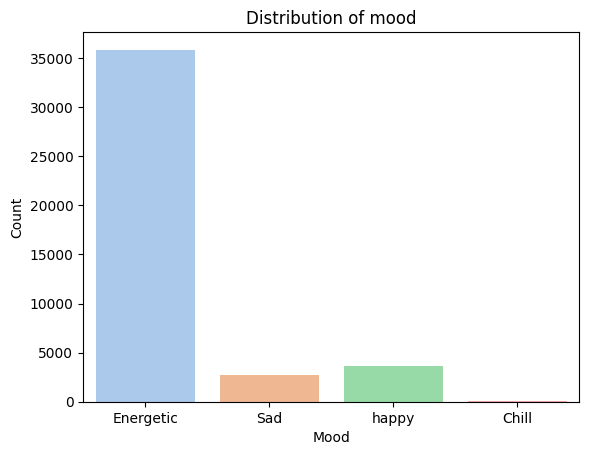

In [18]:
sns.countplot(x="mood", data=data, palette="pastel")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.title("Distribution of mood")
plt.show()

In [19]:
#playlist based on moods hehe
happy_playlist=data[data["mood"]=="happy"]
sad_playlist=data[data["mood"]=="sad"]
chill_playlist=data[data["mood"]=="chill"]
energetic_playlist=data[data["mood"]=="energetic"]

#saving playlist
happy_playlist.to_csv("happy_playlist.csv", index=False)
sad_playlist.to_csv("sad_playlist.csv", index=False)
chill_playlist.to_csv("chill_playlist.csv", index=False)
energetic_playlist.to_csv("energetic_playlist.csv", index=False)

print(happy_playlist[["song_name", "genre"]].head(20))

                        song_name      genre
21                 High 'N Mighty  Dark Trap
28                     BLUE JUICE  Dark Trap
93                        Rapture  Dark Trap
99       Sneak Diss (feat. So6ix)  Dark Trap
109                          Dirt  Dark Trap
195                   Smoke Break  Dark Trap
211                   Benadrylled  Dark Trap
236                     SPEEDBOAT  Dark Trap
265             Murder On My Mind  Dark Trap
284  ONCE UPON A TIME (FREESTYLE)  Dark Trap
353                          Mrs.  Dark Trap
450                 Fashion Killa  Dark Trap
459                    Flash Bang  Dark Trap
555                Super Fun Time  Dark Trap
588                          Fbgm  Dark Trap
591                     WET EM UP  Dark Trap
593                     SHAMELESS  Dark Trap
599             Killin' on Demand  Dark Trap
619         Ricky Bobby Six Speed  Dark Trap
626                   Another Day  Dark Trap


In [20]:
#data based on runtime of song

data["duration_min"]=data["duration_ms"]/60000
data[["song_name", "duration_ms", "duration_min"]].head(10)

,song_name,duration_ms,duration_min
0,Mercury: Retrograde,124539,2.075650
1,Pathology,224427,3.740450
2,Symbiote,98821,1.647017
3,ProductOfDrugs (Prod. The Virus and Antidote),123661,2.061017
4,Venom,123298,2.054967
5,Gatteka,112511,1.875183
6,kamikaze (+ pulse),77584,1.293067
7,T.R.U. (Totally Rotten Underground),127524,2.125400
8,I Put My Dick in Your Mental,140326,2.338767
9,Andromeda,121979,2.032983


In [21]:
#seggregate data based on duration

def duration_category(duration):
  if duration<2:
    return "Small"
  elif 2<=duration<=4:
    return "Medium"
  else:
    return "Large"

data["duration_category"]=data["duration_min"].apply(duration_category)
print(data["duration_category"].value_counts())
#print(data["duration_category"].count())


duration_category
Medium    22462
Large     17882
Small      1961
Name: count, dtype: int64


In [22]:
duration_genre=data.groupby("genre")["duration_category"].agg(lambda x: x.mode()[0])

print(duration_genre)

genre
Dark Trap          Medium
Emo                Medium
Hiphop             Medium
Pop                Medium
Rap                Medium
RnB                Medium
Trap Metal         Medium
Underground Rap    Medium
dnb                 Large
hardstyle          Medium
psytrance           Large
techhouse           Large
techno              Large
trance              Large
trap               Medium
Name: duration_category, dtype: object


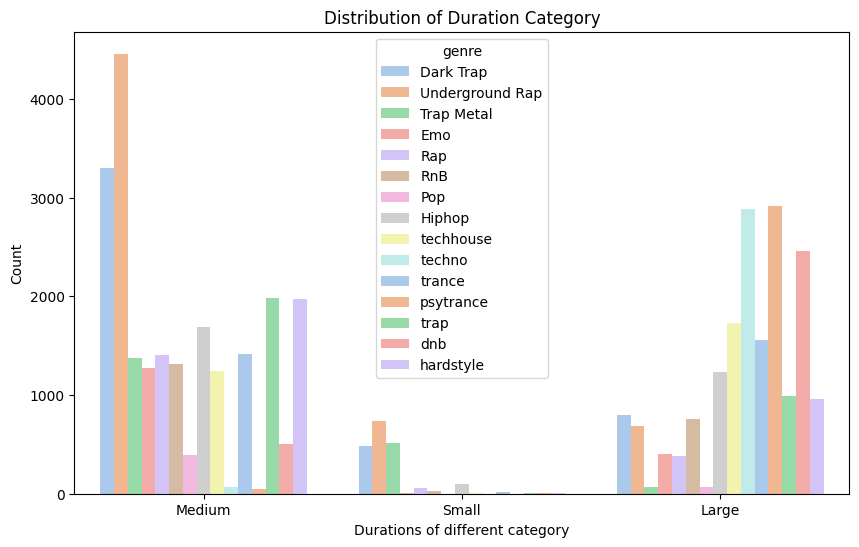

In [23]:
#visualise

plt.figure(figsize=(10,6))
sns.countplot(x="duration_category", hue="genre" , data=data, palette="pastel")
plt.xlabel("Durations of different category")
plt.ylabel("Count")
plt.title("Distribution of Duration Category")
plt.show()

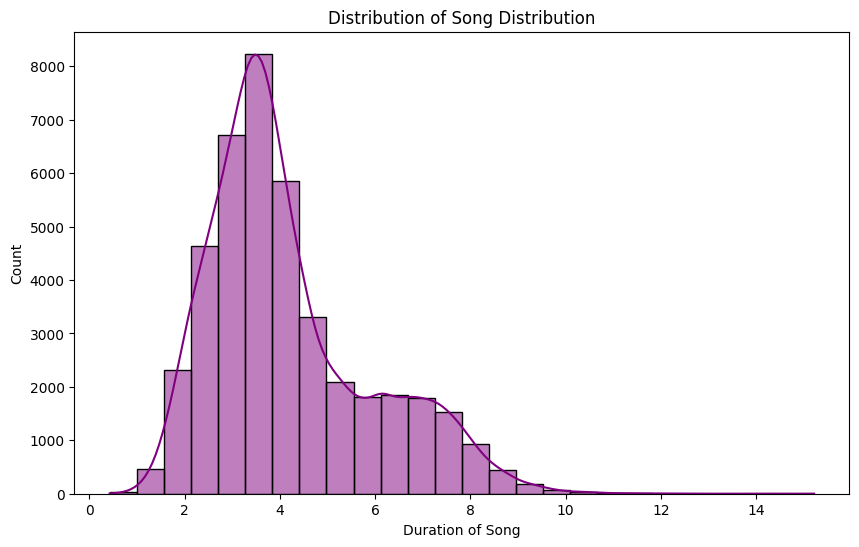

In [24]:
#distribution of song duration

plt.figure(figsize=(10,6))
sns.histplot(data["duration_min"], bins=26, kde=True, color="purple")
plt.xlabel("Duration of Song")
plt.ylabel("Count")
plt.title("Distribution of Song Distribution")
plt.show()

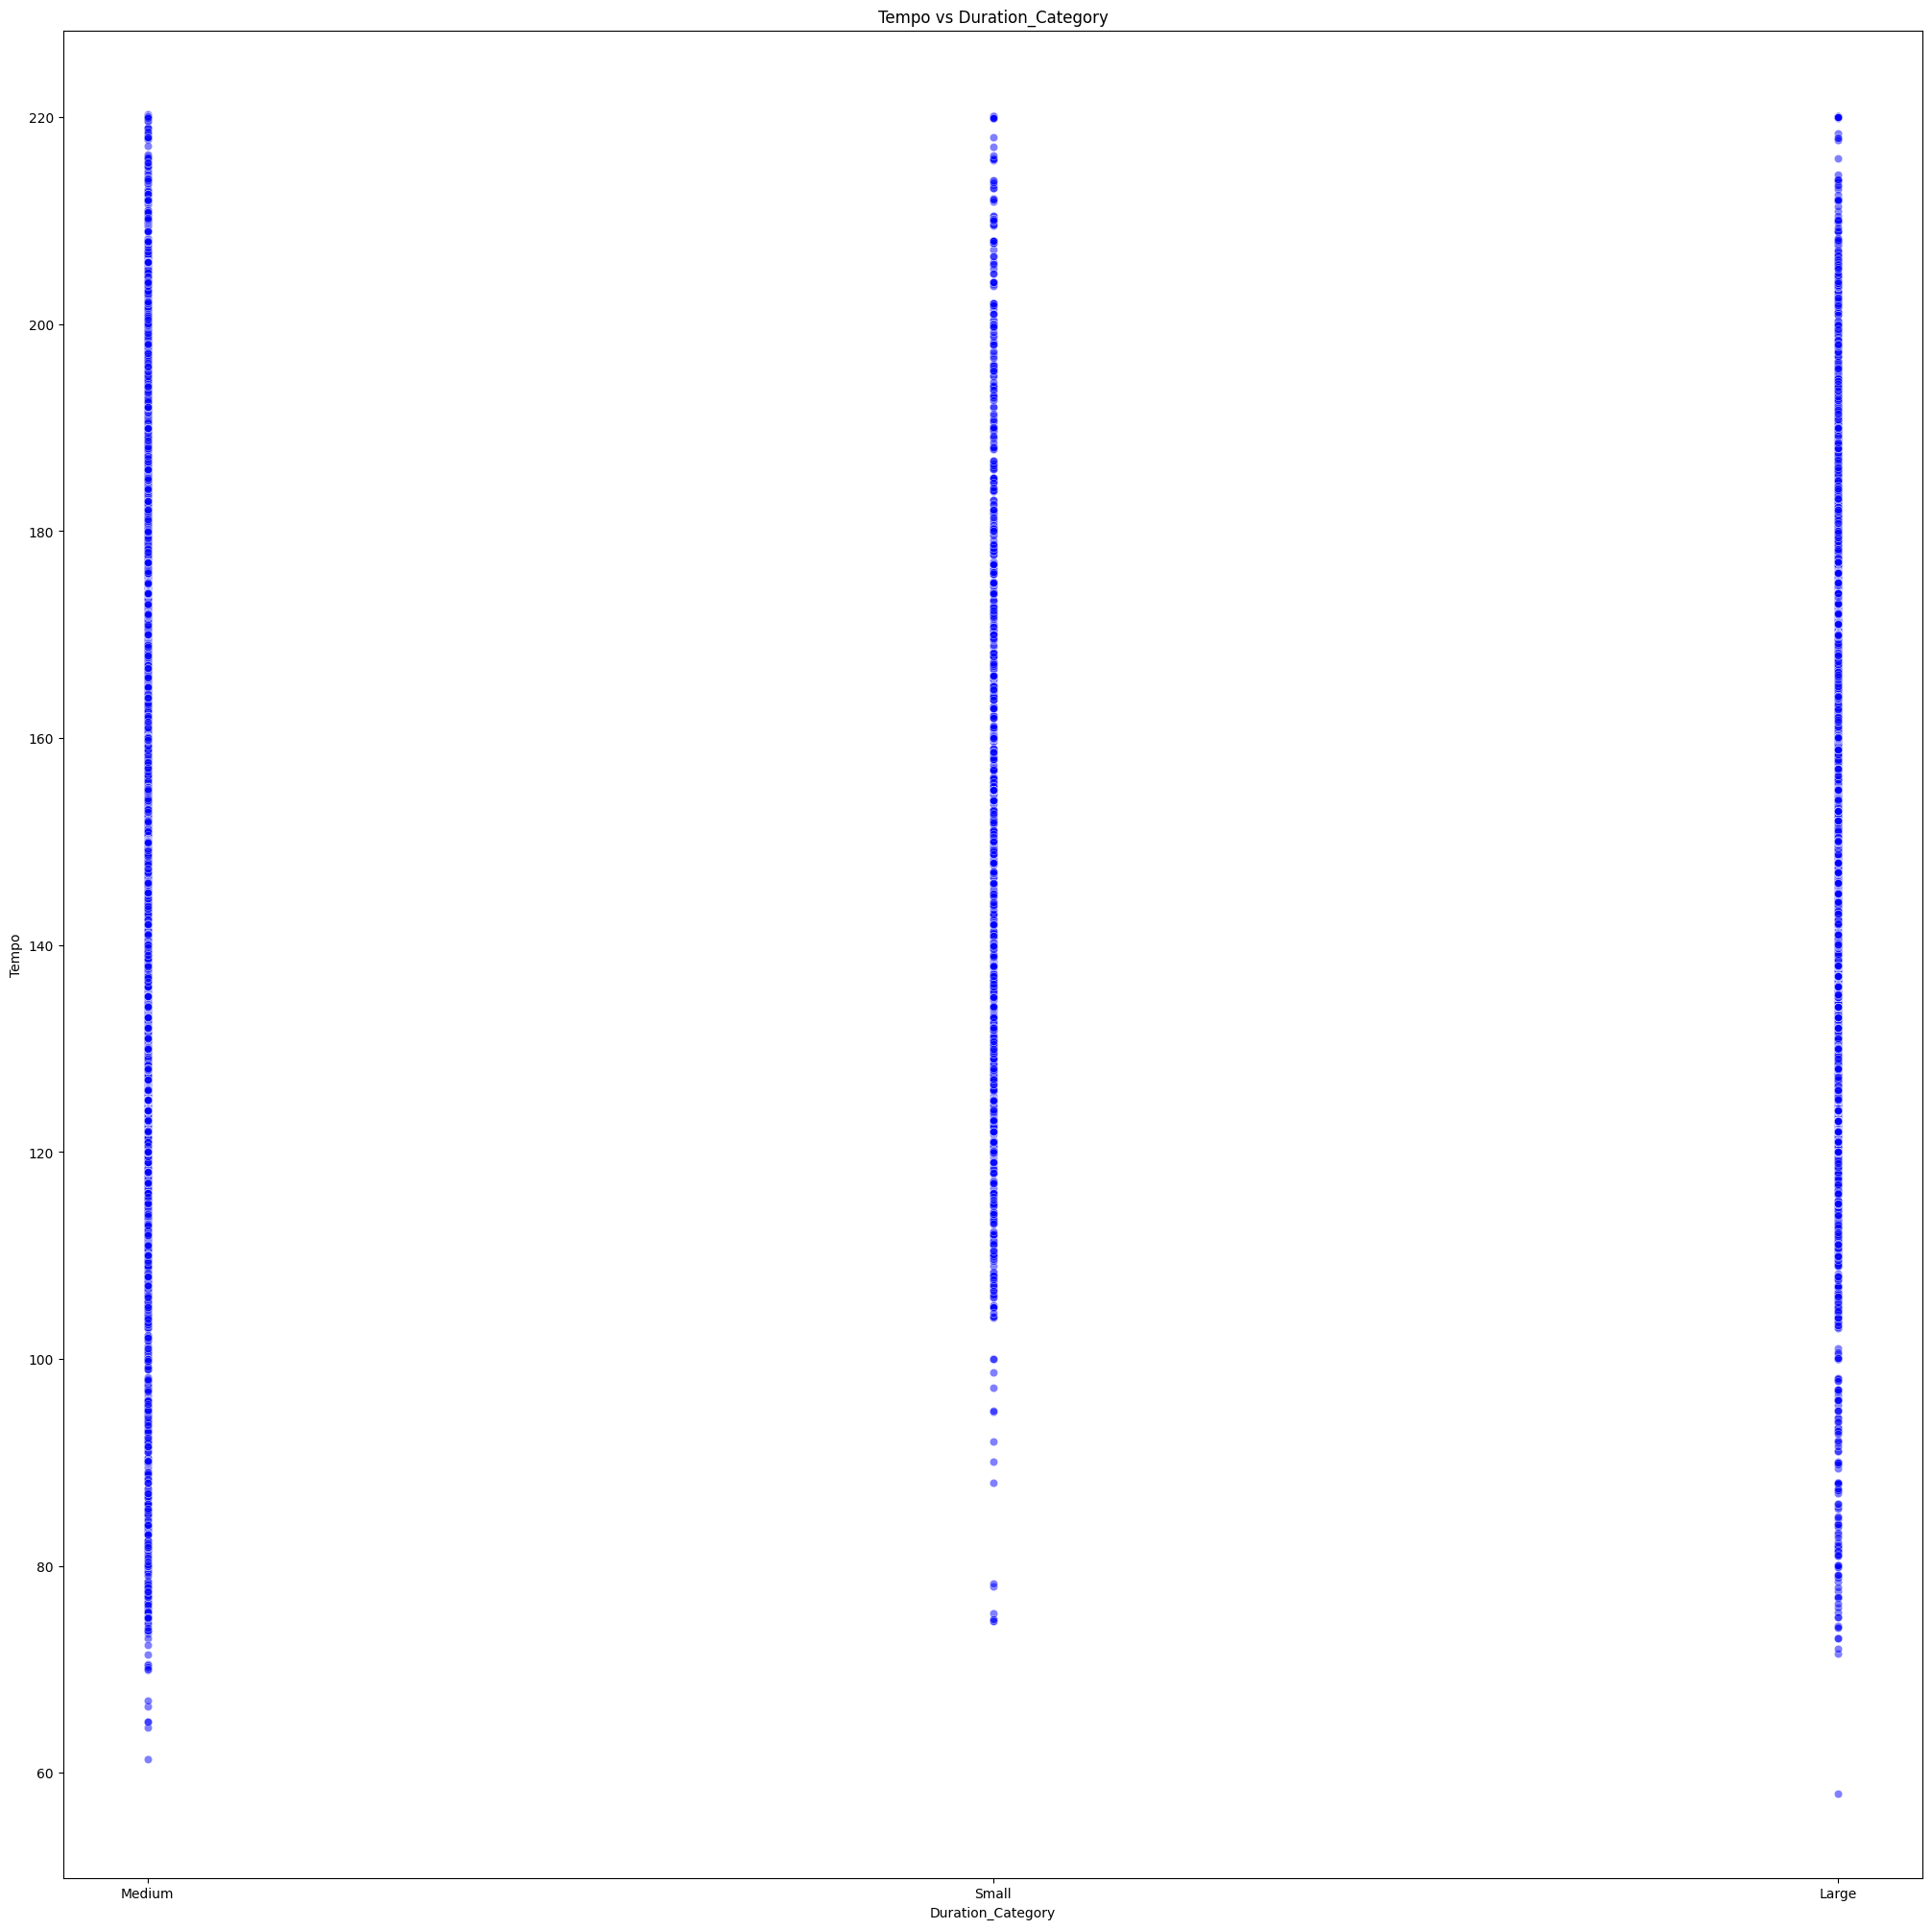

In [25]:
plt.figure(figsize=(25,25))
sns.scatterplot(x="duration_category", y="tempo", data=data, alpha=0.5,
                color="blue")
plt.xlabel("Duration_Category")
plt.ylabel("Tempo")
plt.title("Tempo vs Duration_Category")
plt.show()


In [26]:
#Flask
server= Flask(__name__)

#Dash
app=dash.Dash(__name__, server=server, routes_pathname_prefix="/")

In [27]:
#Layout of Dashboard

app.layout=html.Div([
    html.H1("Spotify Data Dashboard", style={"textAligh": 'center'}),
    #Genre Dropdown
    html.Label("Select Genre: "),
    dcc.Dropdown(
        id="genre-dropdown",
        options=[{"label": genre, "value": genre} for genre in data["genre"].unique()],
        placeholder="Select a Genre",
        multi=False
    ),
    #Graphs
    dcc.Graph(id="danceability-graph"),
    dcc.Graph(id="tempo-duration-scatter"),
    dcc.Graph(id="mood-distribution"),
])

In [28]:
#callbacks for Graph Updates
@app.callback(
    Output("danceability-graph", "figure"),
    [Input("genre-dropdown", "value")]
)

def update_danceability(selected_genre):
  filtered_data=data if selected_genre is None else data[data["genre"]==selected_genre]
  fig=px.histogram(filtered_data, x="danceability", title="Danceability Distribution")
  return fig

@app.callback(
    Output("tempo-duration-scatter", "figure"),
    [Input("genre-dropdown","value")]
)

def update_scatter(selected_genre):
  filtered_data=data if selected_genre is None else data[data["genre"]==selected_genre]
  fig=px.scatter(filtered_data, x="duration_min", y="tempo",
                 color="danceability", title="Tempo vs Duration",
                 labels={"duration_min": "Song Duration(minutes)",
                         "tempo": "Tempo(BPM)"})
  return fig

@app.callback(
    Output("mood-distribution", "figure"),
    [Input("genre-dropdown", "value")]
)

def update_mood(selected_genre):
  filtered_data=data if selected_genre is None else data[data["genre"]==selected_genre]
  fig=px.histogram(filtered_data, x="mood", title="Mood Distribution")
  return fig

In [29]:
#Running App
if __name__=="__main__":
  port=8050
  public_url=ngrok.connect(port).public_url
  print(f"Dashboard is running at: {public_url}")
  app.run_server(debug=True, port=port)

Dashboard is running at: https://c3b2-34-80-249-235.ngrok-free.app
Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: on


In [30]:
!git clone https://github.com/Theallkeeeymist/Spotify-Data-Analysis



Cloning into 'Spotify-Data-Analysis'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [31]:
%cd Spotify-Data-Analysis

/content/Spotify-Data-Analysis
